In [1]:
import pandas as pd

def process(text: str):
    from parse import compile
    from string import punctuation

    p = compile("{hit:d}.")
    in_list = text.split()
    out_list = list()
    for seg in in_list:
        parse_result = p.parse(seg)
        if parse_result:
            # We got a number with a dot afterward:
            out_list.append(seg.lower())
        else:
            out_list.append(seg.translate(str.maketrans("", "", punctuation)).lower())
    return " ".join(out_list)



df = pd.read_json("ParlaSpeech-HR.v1.0.jsonl", orient="records", lines=True)
df["audio_length"] = df.end-df.start
df = df[df.audio_length >= 8]
df = pd.concat([df, df.speaker_info.apply(pd.Series)], axis=1)
df.head(3)

,path,orig_file,start,end,words,word_start_times,norm_words,norm_words_start_times,utterance_id_start,utterance_id_end,...,norm_words_edited,audio_length,Speaker_role,Speaker_type,Speaker_party,Speaker_party_name,Party_status,Speaker_name,Speaker_gender,Speaker_birth
0,rFVDr4ghXlQ_10620.07-10632.05.wav,"20 2 2020 - 1. dio, 16. sjednica, 9. saziv [rF...",10620.07,10632.05,"[interpretacija,, inzistiranje, na, tim, dezin...","[0, 1.0, 1.83, 1.96, 2.22, 3.79, 4.01, 4.43, 5...","[interpretacija, inzistiranje, na, tim, dezinf...","[0, 1.0, 1.83, 1.96, 2.22, 3.79, 4.01, 4.43, 5...",ParlaMint-HR_S16.u4568,ParlaMint-HR_S16.u4568,...,NaN,11.98,Regular,MP,HDZ,Klub Hrvatske demokratske zajednice,Coalition,"Tuđman, Miroslav",M,1946
1,Ki_SnDM_EkQ_2917.58-2937.5.wav,"18 10 2018 - 9. sjednica, 9. saziv [Ki_SnDM_Ek...",2917.58,2937.50,"[izraelska, tvrtka, prodaje, avione, Hrvatskoj...","[0, 0.65, 1.04, 1.54, 1.92, 2.51, 3.11, 3.5700...","[izraelska, tvrtka, prodaje, avione, hrvatskoj...","[0, 0.65, 1.04, 1.54, 1.92, 2.51, 3.11, 3.5700...",ParlaMint-HR_S09.u4267,ParlaMint-HR_S09.u4267,...,NaN,19.92,Regular,MP,"Živi zid, SNAGA",Klub Živog zida i SNAGA-e,Opposition,"Bunjac, Branimir",M,1972
2,XguZsDKdRh4_13797.59-13811.74.wav,"20 1 2017 - 3. sjednica, 9. saziv [XguZsDKdRh4...",13797.59,13811.74,"[jučer, trećem,, sutra, ili, prekosutra, četvr...","[0, 0.43, 1.0, 1.4, 1.52, 2.01, 2.55, 3.12, 3....","[jučer, trećem, sutra, ili, prekosutra, četvrt...","[0, 0.43, 1.0, 1.4, 1.52, 2.01, 2.55, 3.12, 3....",ParlaMint-HR_S03.u9702,ParlaMint-HR_S03.u9702,...,NaN,14.15,Regular,MP,HDZ,Klub Hrvatske demokratske zajednice,Coalition,"Bačić, Branko",M,1959


In [2]:
from scipy.stats import mode
gb = df.groupby("Speaker_name").agg({"audio_length": "sum", "Speaker_gender": lambda i: mode(i)[0][0]})

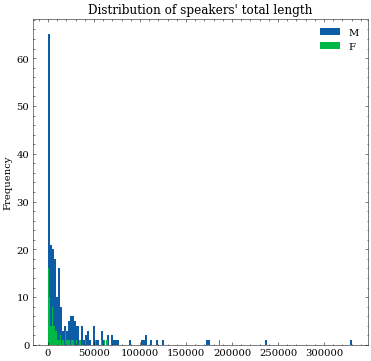

In [3]:
import matplotlib.pyplot as plt
plt.style.use("science no-latex".split())

fig, ax = plt.subplots(figsize=(6,6))
for gender in "MF":
    gb[gb.Speaker_gender == gender].audio_length.plot.hist(ax=ax, label=gender, bins=150)
plt.legend()
plt.title("Distribution of speakers' total length")
plt.show()

In [4]:
def get_video_from_file(s: str)->str:
    pattern = "{rest} [{video}]"
    from parse import compile
    p = compile(pattern)
    results = p.search(s)
    if results:
        return results["video"]
    return None

df["video"] = df.orig_file.apply(get_video_from_file)

In [5]:
df.head(2)

,path,orig_file,start,end,words,word_start_times,norm_words,norm_words_start_times,utterance_id_start,utterance_id_end,...,audio_length,Speaker_role,Speaker_type,Speaker_party,Speaker_party_name,Party_status,Speaker_name,Speaker_gender,Speaker_birth,video
0,rFVDr4ghXlQ_10620.07-10632.05.wav,"20 2 2020 - 1. dio, 16. sjednica, 9. saziv [rF...",10620.07,10632.05,"[interpretacija,, inzistiranje, na, tim, dezin...","[0, 1.0, 1.83, 1.96, 2.22, 3.79, 4.01, 4.43, 5...","[interpretacija, inzistiranje, na, tim, dezinf...","[0, 1.0, 1.83, 1.96, 2.22, 3.79, 4.01, 4.43, 5...",ParlaMint-HR_S16.u4568,ParlaMint-HR_S16.u4568,...,11.98,Regular,MP,HDZ,Klub Hrvatske demokratske zajednice,Coalition,"Tuđman, Miroslav",M,1946,rFVDr4ghXlQ
1,Ki_SnDM_EkQ_2917.58-2937.5.wav,"18 10 2018 - 9. sjednica, 9. saziv [Ki_SnDM_Ek...",2917.58,2937.50,"[izraelska, tvrtka, prodaje, avione, Hrvatskoj...","[0, 0.65, 1.04, 1.54, 1.92, 2.51, 3.11, 3.5700...","[izraelska, tvrtka, prodaje, avione, hrvatskoj...","[0, 0.65, 1.04, 1.54, 1.92, 2.51, 3.11, 3.5700...",ParlaMint-HR_S09.u4267,ParlaMint-HR_S09.u4267,...,19.92,Regular,MP,"Živi zid, SNAGA",Klub Živog zida i SNAGA-e,Opposition,"Bunjac, Branimir",M,1972,Ki_SnDM_EkQ


In [6]:
gb = df.groupby("Speaker_name").agg({
    "path": "count",
    "Speaker_gender": lambda i: i.iloc[0],
    "video": lambda i: len(set(i))
}).rename(columns={"path": "Count"}).sort_values(by="Count", ascending=False)
gb =  gb.loc[(gb.Count > 200) & (gb.Count < 3000)]
gb

,Count,Speaker_gender,video
Speaker_name,,,
"Đujić, Saša",2980,M,132
"Bauk, Arsen",2914,M,166
"Babić, Ante",2727,M,207
"Jovanović, Željko",2718,M,175
"Lenart, Željko",2624,M,150
...,...,...,...
"Pejčinović Burić, Marija",220,F,12
"Ramljak, Branka",219,F,9
"Bilek, Vladimir",216,M,17


In [7]:
suitable_speakers = gb.index.tolist()
subset = df[df.Speaker_name.isin(suitable_speakers)]
subset.shape

(160159, 23)

Target procedure:

"Speaker identification (closed, 50 speakers, 100 instances in train per speaker, 10 in dev 10 in test, same in train, dev and test, each bin from different video subsets"



In [8]:
male_speakers = gb[gb.Speaker_gender == "M"].index.tolist()[0:35]
female_speakers = gb[gb.Speaker_gender == "F"].index.tolist()[0:35]

accepted_speakers = male_speakers + female_speakers

In [9]:
results = dict()
for speaker in accepted_speakers:
    train = list()
    dev = list()
    test = list()

    gb = subset[subset.Speaker_name==speaker].groupby("video").agg({"start":"count", "path": list})
    for i, row in gb.iterrows():
        if len(train) < 100:
            train.extend(row["path"][0:100 - len(train)])
            continue
        elif len(dev) < 10:
            dev.extend(row["path"][0:10 - len(dev)])
            continue
        elif len(test) < 10:
            test.extend(row["path"][0:10 - len(test)])
            continue
        else:
            break
    results[speaker] = {"train": train, "dev": dev, "test": test}


In [10]:
splits = pd.DataFrame(data=results).T
splits.shape

(70, 3)

In [11]:
pd.set_option('display.max_rows', 500)
splits

,train,dev,test
"Đujić, Saša","[-EO06cT21uY_12042.5-12062.39.wav, -EO06cT21uY...","[3YwjvKTcTlI_8687.86-8707.57.wav, 3YwjvKTcTlI_...","[3bkC9ujsy_o_21792.43-21811.55.wav, 3bkC9ujsy_..."
"Bauk, Arsen","[-ZstXL0NcOo_9046.47-9066.34.wav, -ZstXL0NcOo_...","[0b6RVqesEUE_13139.69-13159.45.wav, 0b6RVqesEU...","[14gZyn_QyTw_9993.07-10007.92.wav, 14gZyn_QyTw..."
"Babić, Ante","[-EO06cT21uY_3184.67-3204.46.wav, -EO06cT21uY_...","[1VEe0dkWXfc_11940.96-11960.55.wav, 1VEe0dkWXf...","[1WBg7il8jfQ_22419.86-22439.21.wav, 1WBg7il8jf..."
"Jovanović, Željko","[-ZstXL0NcOo_10652.2-10672.07.wav, -ZstXL0NcOo...","[1WBg7il8jfQ_3877.85-3897.74.wav, 1WBg7il8jfQ_...","[1qhxcYJg5yk_9312.4-9332.02.wav, 1qhxcYJg5yk_9..."
"Lenart, Željko","[-HUBqKWPLr4_8895.34-8909.54.wav, -HUBqKWPLr4_...","[64LGQKLo4Pw_7860.66-7869.14.wav, 64LGQKLo4Pw_...","[6EuGqDbXDRw_8669.92-8686.1.wav, 6EuGqDbXDRw_8..."
"Beus Richembergh, Goran","[-EO06cT21uY_7754.39-7763.55.wav, -EO06cT21uY_...","[0n_W0iHVhpU_20641.54-20661.23.wav, 0n_W0iHVhp...","[1VEe0dkWXfc_4073.66-4093.45.wav, 1VEe0dkWXfc_..."
"Petrov, Božo","[-OnnGofk_To_1156.9-1170.66.wav, -OnnGofk_To_1...","[1s4JHlcC_rM_5073.19-5086.24.wav, 1s4JHlcC_rM_...","[3BpXkh8n9Rw_10322.78-10341.9.wav, 3BpXkh8n9Rw..."
"Pupovac, Milorad","[08nTrgdbSeM_3684.87-3702.6.wav, 08nTrgdbSeM_3...","[2fQFB7EUWeg_12631.33-12649.93.wav, 2fQFB7EUWe...","[3Is860qq5QQ_4634.82-4646.91.wav, 3Is860qq5QQ_..."
"Lalovac, Boris","[-EO06cT21uY_21465.36-21481.76.wav, -EO06cT21u...","[13CIIGY5gg0_4497.04-4517.01.wav, 13CIIGY5gg0_...","[14gZyn_QyTw_9544.95-9564.44.wav, 14gZyn_QyTw_..."
"Culej, Stevo","[-HUBqKWPLr4_7820.3-7840.14.wav, -HUBqKWPLr4_4...","[3J-MLuBDwC4_5868.74-5887.89.wav, 3J-MLuBDwC4_...","[41IJX-I7KUk_7749.45-7769.27.wav, 41IJX-I7KUk_..."


In [12]:
splits["Speaker_gender"] = ["M" if speaker in male_speakers else "F" for speaker in splits.index]

In [13]:
splits.Speaker_gender.value_counts()

M    35
F    35
Name: Speaker_gender, dtype: int64

In [15]:
splits=splits.drop(["Pirnat Dragičević, Helenca", "Škibola, Marin"])

In [16]:
final_splits = pd.concat([
    splits[splits.Speaker_gender == "M"][0:25],
    splits[splits.Speaker_gender == "F"][0:25],
])
final_splits.head(2)

,train,dev,test,Speaker_gender
"Đujić, Saša","[-EO06cT21uY_12042.5-12062.39.wav, -EO06cT21uY...","[3YwjvKTcTlI_8687.86-8707.57.wav, 3YwjvKTcTlI_...","[3bkC9ujsy_o_21792.43-21811.55.wav, 3bkC9ujsy_...",M
"Bauk, Arsen","[-ZstXL0NcOo_9046.47-9066.34.wav, -ZstXL0NcOo_...","[0b6RVqesEUE_13139.69-13159.45.wav, 0b6RVqesEU...","[14gZyn_QyTw_9993.07-10007.92.wav, 14gZyn_QyTw...",M


In [17]:
files_to_move = []

for col in "train dev test".split():
    for l in final_splits[col].values:
        files_to_move.extend(l)

In [18]:
files_to_move = ["seg."+i for i in files_to_move]
with open("03_files_to_move.txt", "w") as f:
    for i in files_to_move:
        f.write(i+"\n")

In [20]:
results = list()
from tqdm.auto import tqdm
for i, row in tqdm(final_splits.iterrows()):
    name = i
    for split in "train test dev".split():
        l = row[split]
        for i in l:
            results.append({
                "path": i,
                "Speaker_name": name,
                "split": split,
            })


0it [00:00, ?it/s]

In [21]:
pd.DataFrame(data=results).to_csv("003_speaker_id.csv", index=False)

# Are the splits hygenic? 

Meaning that for a single speaker videos from different splits do not overlap?

In [22]:
import pandas as pd
df = pd.read_csv("003_speaker_id.csv")
df.head()

,path,Speaker_name,split
0,-EO06cT21uY_12042.5-12062.39.wav,"Đujić, Saša",train
1,-EO06cT21uY_10882.27-10901.74.wav,"Đujić, Saša",train
2,-EO06cT21uY_10822.1-10841.86.wav,"Đujić, Saša",train
3,-EO06cT21uY_10782.32-10802.31.wav,"Đujić, Saša",train
4,-EO06cT21uY_11066.39-11086.05.wav,"Đujić, Saša",train


In [23]:
from tqdm.auto import tqdm

for speaker in tqdm(df.Speaker_name.unique()):
    subset = df[df.Speaker_name == speaker]
    train_videos = set(subset[subset.split=="train"].path.values.tolist())
    test_videos = set(subset[subset.split=="test"].path.values.tolist())
    dev_videos = set(subset[subset.split=="dev"].path.values.tolist())
    assert train_videos.intersection(dev_videos) == set(), "FOUND DUPLICATE VIDEOS IN train AND test"
    assert train_videos.intersection(test_videos) == set(), "FOUND DUPLICATE VIDEOS IN train AND test"

  0%|          | 0/50 [00:00<?, ?it/s]

# What are the lengths of the examples used?

In [24]:
ps = pd.read_json("ParlaSpeech-HR.v1.0.jsonl", orient="records", lines=True).loc[:, ["path", "start", "end"]]
ps["duration"] = ps.end-ps.start

ps = ps.loc[:, ["path", "duration"]]
ps.head()

,path,duration
0,rFVDr4ghXlQ_10620.07-10632.05.wav,11.98
1,Ki_SnDM_EkQ_2917.58-2937.5.wav,19.92
2,XguZsDKdRh4_13797.59-13811.74.wav,14.15
3,WoEEFk8lcDA_9583.27-9599.62.wav,16.35
4,3Mq8QFXNMlc_15372.6-15392.22.wav,19.62


In [5]:
joined = pd.merge(df, ps, on="path", how="right")

In [6]:
joined.head(2)

,Speaker_name,split,path,duration
0,"Lenart, Željko",train,-HUBqKWPLr4_8895.34-8909.54.wav,14.20
1,"Lenart, Željko",train,-HUBqKWPLr4_8950.34-8970.05.wav,19.71


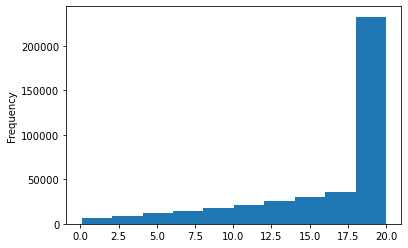

In [7]:
joined.duration.plot.hist()

In [8]:
joined[joined.duration < 3].shape[0]/joined.shape[0]

0.024717459924490932

# What about data for 002: gender?

In [9]:
import pandas as pd
df = pd.concat([
    pd.read_csv("001_gender_train.csv"),
    pd.read_csv("001_gender_test.csv")])
joined = pd.merge(df, ps, on="path", how="right")

In [11]:
joined[joined.duration < 8].shape[0]/joined.shape[0]

0.10112520888778857